In [1]:
%pip install ultralytics

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
#from google.colab import drive
#drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
import os

# Provide the local path to the file
file_path = r'C:\Users\pavan\OneDrive\Desktop\helmet detection'

# Check if the file exists
if os.path.exists(file_path):
    print("File exists")
else:
    print("File does not exist")


File exists


In [2]:
from PIL import Image
import cv2
from matplotlib import pyplot as plt

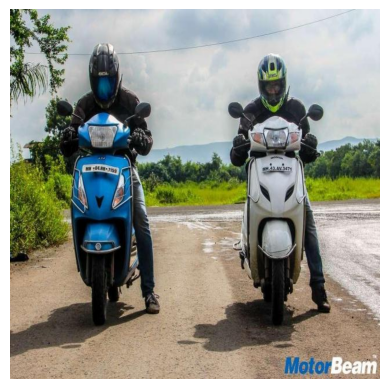

In [3]:

img = Image.open("valid/images/098-Rhythm48_jpg.rf.8b2a9e19de7462ffbc01defcf5af3d2a.jpg")
plt.axis('off')
plt.imshow(img)


In [4]:
from ultralytics import YOLO

# Load the YOLOv8 model
YOLOv8_model = YOLO(r"best.pt")



In [13]:
YOLOv8_model.predict(img, save=True, save_txt=True)


0: 640x640 2 0s, 2 2s, 2 4s, 125.0ms
Speed: 0.0ms preprocess, 125.0ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs\detect\predict
1 label saved to runs\detect\predict\labels


[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: None
 masks: None
 names: {0: '0', 1: '1', 2: '2', 3: '3', 4: '4'}
 obb: None
 orig_img: array([[[ 42,  49,  44],
         [ 18,  31,  23],
         [ 27,  46,  37],
         ...,
         [241, 233, 226],
         [241, 233, 226],
         [241, 233, 226]],
 
        [[ 19,  25,  20],
         [ 11,  22,  14],
         [  0,  19,  10],
         ...,
         [241, 233, 226],
         [241, 233, 226],
         [241, 233, 226]],
 
        [[ 25,  29,  24],
         [ 28,  36,  29],
         [ 19,  34,  26],
         ...,
         [241, 233, 226],
         [241, 233, 226],
         [241, 233, 226]],
 
        ...,
 
        [[142, 167, 193],
         [124, 149, 175],
         [112, 137, 163],
         ...,
         [128, 149, 176],
         [110, 131, 158],
         [ 88, 109, 136]],
 
        [[144, 169, 195],
         [132, 157, 183],
         [126, 151, 177],
     

In [14]:
result=[]
with open(r'runs\detect\predict\labels\098-Rhythm48_jpg.rf.8b2a9e19de7462ffbc01defcf5af3d2a.txt', 'r') as f:
    line = f.readline()
    while line:
      result.append(list(map(float,line.split())))
      line = f.readline()
print(result)

[[4.0, 0.252593, 0.444815, 0.2235, 0.823954], [2.0, 0.255135, 0.173192, 0.10081, 0.188454], [4.0, 0.715189, 0.443938, 0.215496, 0.737478], [2.0, 0.709545, 0.194865, 0.0985912, 0.162751], [0.0, 0.721867, 0.42638, 0.0968269, 0.0463249], [0.0, 0.242748, 0.432662, 0.113141, 0.0377842]]


In [15]:
height, width = img.size
print(height, width)

640 640


In [16]:
x_center, y_center, bbox_width, bbox_height=  0.715189, 0.443938, 0.215496, 0.737478

In [17]:
x1 = int((x_center - bbox_width/2) * height)
y1 = int((y_center - bbox_height/2) * width)
x2 = int((x_center + bbox_width/2) * height)
y2 = int((y_center + bbox_height/2) * width)

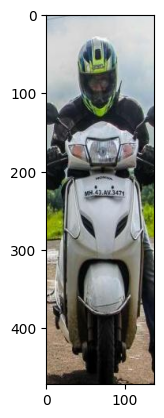

In [18]:
cropped_image = img.crop((x1, y1, x2, y2))

# Display the cropped image
plt.imshow(cropped_image)

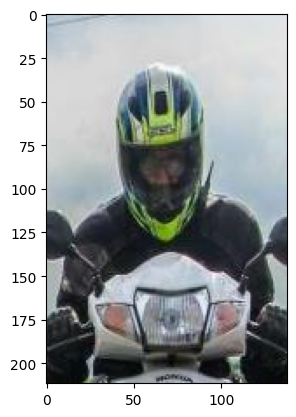

In [19]:
roi =  img.crop((x1, y1, x2, y2//2))

plt.imshow(roi)

In [20]:
YOLOv8_model.predict(roi,save = True, save_txt=True)


0: 640x448 1 2, 122.5ms
Speed: 0.0ms preprocess, 122.5ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 448)
Results saved to runs\detect\predict
2 labels saved to runs\detect\predict\labels


[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: None
 masks: None
 names: {0: '0', 1: '1', 2: '2', 3: '3', 4: '4'}
 obb: None
 orig_img: array([[[206, 193, 177],
         [206, 193, 177],
         [204, 193, 179],
         ...,
         [231, 226, 223],
         [233, 226, 223],
         [231, 226, 223]],
 
        [[207, 194, 178],
         [207, 194, 178],
         [205, 194, 180],
         ...,
         [231, 226, 223],
         [231, 226, 225],
         [231, 226, 225]],
 
        [[208, 195, 179],
         [210, 197, 181],
         [209, 198, 184],
         ...,
         [230, 227, 223],
         [230, 226, 225],
         [230, 226, 225]],
 
        ...,
 
        [[ 19,  20,  24],
         [ 15,  18,  22],
         [ 12,  16,  17],
         ...,
         [ 10,  10,  10],
         [ 11,  13,  14],
         [ 12,  16,  17]],
 
        [[ 21,  17,  22],
         [ 18,  17,  19],
         [ 16,  15,  17],
     

In [21]:
detections = YOLOv8_model.predict(roi, save_txt = False)


0: 640x448 1 2, 116.2ms
Speed: 0.0ms preprocess, 116.2ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 448)


In [22]:
detections

[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: None
 masks: None
 names: {0: '0', 1: '1', 2: '2', 3: '3', 4: '4'}
 obb: None
 orig_img: array([[[206, 193, 177],
         [206, 193, 177],
         [204, 193, 179],
         ...,
         [231, 226, 223],
         [233, 226, 223],
         [231, 226, 223]],
 
        [[207, 194, 178],
         [207, 194, 178],
         [205, 194, 180],
         ...,
         [231, 226, 223],
         [231, 226, 225],
         [231, 226, 225]],
 
        [[208, 195, 179],
         [210, 197, 181],
         [209, 198, 184],
         ...,
         [230, 227, 223],
         [230, 226, 225],
         [230, 226, 225]],
 
        ...,
 
        [[ 19,  20,  24],
         [ 15,  18,  22],
         [ 12,  16,  17],
         ...,
         [ 10,  10,  10],
         [ 11,  13,  14],
         [ 12,  16,  17]],
 
        [[ 21,  17,  22],
         [ 18,  17,  19],
         [ 16,  15,  17],
     

In [23]:
for detection in detections:
    bbox = detection.boxes
    classes = bbox.cls.tolist()
    #print(classes)
    if 1.0 in classes:
      print("find number plate")


In [4]:
import os

In [13]:
folder_path = 'data'
for filename in os.listdir(folder_path):
    # Check if the file is an image
    if filename.endswith(".jpg") or filename.endswith(".png") or filename.endswith(".jpeg"):
        # Construct the full file path
        file_path = os.path.join(folder_path, filename)
        
        # Open the image
        image = Image.open(file_path)
        
        # Resize the image
        resized_image = image.resize((640, 640))
        resized_image= resized_image.rotate(90)
        # Save the resized image, overwriting the original image file
        resized_image.save(file_path)
        img = Image.open(file_path)
        print(img.size)
        

(640, 640)
(640, 640)
(640, 640)
(640, 640)
(640, 640)
(640, 640)
(640, 640)
(640, 640)
(640, 640)
(640, 640)
(640, 640)
(640, 640)
(640, 640)
(640, 640)
(640, 640)
(640, 640)
(640, 640)
(640, 640)


In [14]:
image_folder = 'data'

# List images in the folder
#image_files = [os.path.join(image_folder, file) for file in os.listdir(image_folder) if file.endswith(('.jpg', '.jpeg', '.png'))]

# Process each image
for file in os.listdir(image_folder):
  if file.endswith(('.jpg', '.jpeg', '.png')):
    image_file = os.path.join(image_folder, file)
    #print(image_file)
    YOLOv8_model.predict(image_file, save=True, save_txt=True)


image 1/1 c:\Users\pavan\OneDrive\Desktop\helmet detection\data\20240416_104550.jpg: 640x640 1 0, 1 1, 1 2, 1 3, 3 4s, 242.6ms
Speed: 8.2ms preprocess, 242.6ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs\detect\predict2
1 label saved to runs\detect\predict2\labels

image 1/1 c:\Users\pavan\OneDrive\Desktop\helmet detection\data\20240416_104803.jpg: 640x640 2 0s, 1 1, 1 4, 141.0ms
Speed: 9.0ms preprocess, 141.0ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs\detect\predict2
2 labels saved to runs\detect\predict2\labels

image 1/1 c:\Users\pavan\OneDrive\Desktop\helmet detection\data\20240416_104920.jpg: 640x640 1 0, 2 1s, 2 4s, 179.4ms
Speed: 4.0ms preprocess, 179.4ms inference, 9.3ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs\detect\predict2
3 labels saved to runs\detect\predict2\labels

image 1/1 c:\Users\pavan\OneDrive\Desktop\helmet detection\data\20240416_105445.jpg: 640x

In [5]:
%pip install easyocr
%pip install torch torchvision torchaudio

Note: you may need to restart the kernel to use updated packages.



In [16]:
!pip3 install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu121

Looking in indexes: https://download.pytorch.org/whl/cu121



[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [6]:
import easyocr

In [7]:
reader = easyocr.Reader(['en'], gpu=True)

Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


In [5]:
!python -m pip install paddlepaddle

In [6]:
%pip install "paddleocr>=2.0.1"

Note: you may need to restart the kernel to use updated packages.


In [7]:
from paddleocr import PaddleOCR, draw_ocr
ocr = PaddleOCR(use_angle_cls = True , lang = 'en')

[2024/04/18 09:46:24] ppocr DEBUG: Namespace(help='==SUPPRESS==', use_gpu=False, use_xpu=False, use_npu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, gpu_id=0, image_dir=None, page_num=0, det_algorithm='DB', det_model_dir='C:\\Users\\pavan/.paddleocr/whl\\det\\en\\en_PP-OCRv3_det_infer', det_limit_side_len=960, det_limit_type='max', det_box_type='quad', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, scales=[8, 16, 32], alpha=1.0, beta=1.0, fourier_degree=5, rec_algorithm='SVTR_LCNet', rec_model_dir='C:\\Users\\pavan/.paddleocr/whl\\rec\\en\\en_PP-OCRv4_rec_infer', rec_image_inverse=True, rec_image_shape='3, 48, 320', rec_batch_num=6, max_text_len

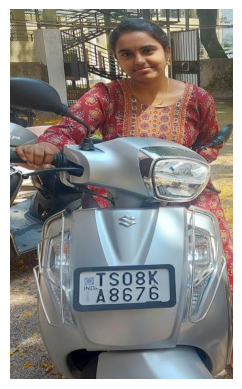


0: 640x416 1 0, 1 1, 1 3, 1 4, 135.5ms
Speed: 6.0ms preprocess, 135.5ms inference, 0.3ms postprocess per image at shape (1, 3, 640, 416)
ultralytics.engine.results.Boxes object with attributes:

cls: tensor([4., 0., 1., 3.])
conf: tensor([0.7656, 0.7184, 0.5068, 0.2758])
data: tensor([[4.1044e+00, 0.0000e+00, 3.6969e+02, 6.3648e+02, 7.6558e-01, 4.0000e+00],
        [1.0545e+02, 4.3179e+02, 2.9994e+02, 5.1176e+02, 7.1835e-01, 0.0000e+00],
        [1.6315e+02, 1.4132e+01, 2.8459e+02, 1.3780e+02, 5.0680e-01, 1.0000e+00],
        [1.6474e+02, 1.4416e+01, 2.8043e+02, 1.3438e+02, 2.7578e-01, 3.0000e+00]])
id: None
is_track: False
orig_shape: (640, 386)
shape: torch.Size([4, 6])
xywh: tensor([[186.8956, 318.2382, 365.5824, 636.4764],
        [202.6924, 471.7755, 194.4923,  79.9782],
        [223.8708,  75.9686, 121.4442, 123.6726],
        [222.5811,  74.3998, 115.6913, 119.9668]])
xywhn: tensor([[0.4842, 0.4972, 0.9471, 0.9945],
        [0.5251, 0.7371, 0.5039, 0.1250],
        [0.5800, 0.1

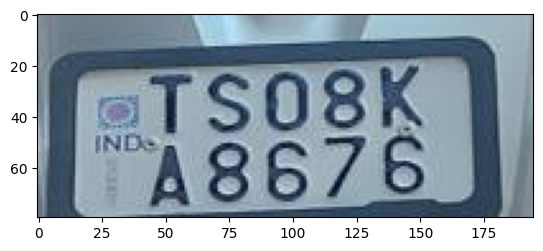

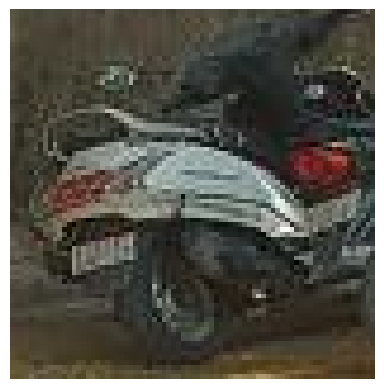


0: 640x640 1 4, 230.0ms
Speed: 2.2ms preprocess, 230.0ms inference, 8.5ms postprocess per image at shape (1, 3, 640, 640)
ultralytics.engine.results.Boxes object with attributes:

cls: tensor([4.])
conf: tensor([0.7055])
data: tensor([[ 2.7336,  2.5753, 74.0477, 77.4966,  0.7055,  4.0000]])
id: None
is_track: False
orig_shape: (78, 77)
shape: torch.Size([1, 6])
xywh: tensor([[38.3907, 40.0360, 71.3141, 74.9212]])
xywhn: tensor([[0.4986, 0.5133, 0.9262, 0.9605]])
xyxy: tensor([[ 2.7336,  2.5753, 74.0477, 77.4966]])
xyxyn: tensor([[0.0355, 0.0330, 0.9617, 0.9935]])


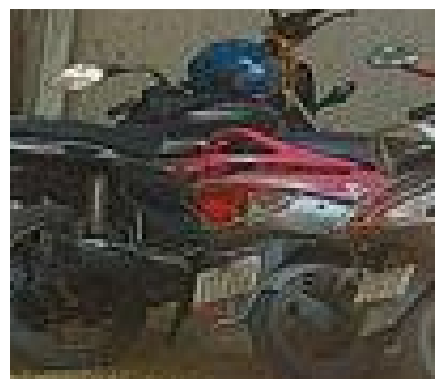


0: 576x640 1 4, 293.8ms
Speed: 6.7ms preprocess, 293.8ms inference, 4.7ms postprocess per image at shape (1, 3, 576, 640)
ultralytics.engine.results.Boxes object with attributes:

cls: tensor([4.])
conf: tensor([0.4725])
data: tensor([[ 6.0111,  4.5162, 99.5031, 82.0312,  0.4725,  4.0000]])
id: None
is_track: False
orig_shape: (87, 100)
shape: torch.Size([1, 6])
xywh: tensor([[52.7571, 43.2737, 93.4921, 77.5150]])
xywhn: tensor([[0.5276, 0.4974, 0.9349, 0.8910]])
xyxy: tensor([[ 6.0111,  4.5162, 99.5031, 82.0312]])
xyxyn: tensor([[0.0601, 0.0519, 0.9950, 0.9429]])


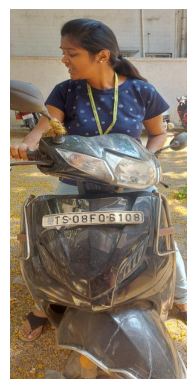


0: 640x320 2 0s, 1 1, 1 4, 190.9ms
Speed: 9.8ms preprocess, 190.9ms inference, 6.5ms postprocess per image at shape (1, 3, 640, 320)
ultralytics.engine.results.Boxes object with attributes:

cls: tensor([0., 4., 1., 0.])
conf: tensor([0.8168, 0.6875, 0.4802, 0.3479])
data: tensor([[4.5146e+01, 3.1907e+02, 2.3533e+02, 3.6931e+02, 8.1675e-01, 0.0000e+00],
        [1.1729e+01, 0.0000e+00, 2.7149e+02, 6.1083e+02, 6.8751e-01, 4.0000e+00],
        [7.3549e+01, 1.5676e+01, 1.8708e+02, 1.2298e+02, 4.8015e-01, 1.0000e+00],
        [8.2892e+01, 3.2911e+02, 2.2682e+02, 3.6397e+02, 3.4787e-01, 0.0000e+00]])
id: None
is_track: False
orig_shape: (613, 293)
shape: torch.Size([4, 6])
xywh: tensor([[140.2366, 344.1880, 190.1816,  50.2382],
        [141.6082, 305.4166, 259.7589, 610.8331],
        [130.3124,  69.3273, 113.5274, 107.3036],
        [154.8534, 346.5373, 143.9232,  34.8604]])
xywhn: tensor([[0.4786, 0.5615, 0.6491, 0.0820],
        [0.4833, 0.4982, 0.8865, 0.9965],
        [0.4448, 0.1131,

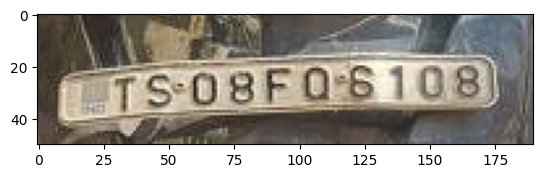

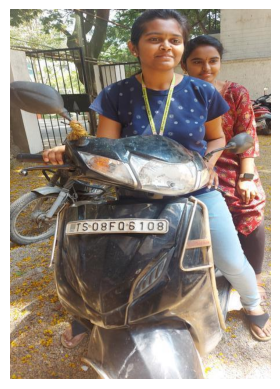


0: 640x480 3 0s, 2 1s, 1 4, 253.1ms
Speed: 7.4ms preprocess, 253.1ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 480)
ultralytics.engine.results.Boxes object with attributes:

cls: tensor([0., 4., 1., 1., 0., 0.])
conf: tensor([0.7965, 0.6939, 0.4999, 0.4435, 0.2701, 0.2661])
data: tensor([[8.8164e+01, 3.5103e+02, 2.8614e+02, 3.9932e+02, 7.9653e-01, 0.0000e+00],
        [2.3146e+01, 7.2910e-01, 4.2553e+02, 6.3605e+02, 6.9395e-01, 4.0000e+00],
        [1.9371e+02, 3.6605e-01, 3.1271e+02, 1.2422e+02, 4.9988e-01, 1.0000e+00],
        [2.9247e+02, 4.1333e+01, 3.7522e+02, 1.3095e+02, 4.4345e-01, 1.0000e+00],
        [9.2525e+01, 3.5712e+02, 2.4269e+02, 3.9317e+02, 2.7009e-01, 0.0000e+00],
        [8.0510e+01, 3.3671e+02, 2.9050e+02, 4.0274e+02, 2.6607e-01, 0.0000e+00]])
id: None
is_track: False
orig_shape: (638, 449)
shape: torch.Size([6, 6])
xywh: tensor([[187.1507, 375.1745, 197.9743,  48.2943],
        [224.3380, 318.3904, 402.3844, 635.3224],
        [253.2098,  62.2908

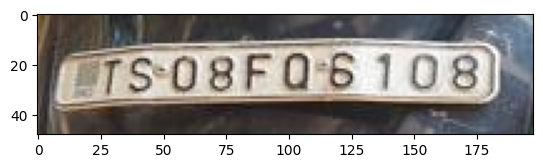

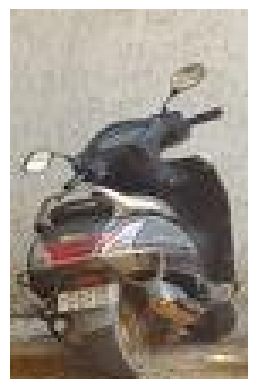


0: 640x416 1 4, 207.0ms
Speed: 8.7ms preprocess, 207.0ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 416)
ultralytics.engine.results.Boxes object with attributes:

cls: tensor([4.])
conf: tensor([0.6222])
data: tensor([[  0.8663,   2.2447,  65.8441, 108.8701,   0.6222,   4.0000]])
id: None
is_track: False
orig_shape: (109, 70)
shape: torch.Size([1, 6])
xywh: tensor([[ 33.3552,  55.5574,  64.9778, 106.6255]])
xywhn: tensor([[0.4765, 0.5097, 0.9283, 0.9782]])
xyxy: tensor([[  0.8663,   2.2447,  65.8441, 108.8701]])
xyxyn: tensor([[0.0124, 0.0206, 0.9406, 0.9988]])


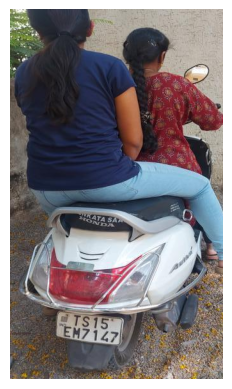


0: 640x384 1 0, 2 2s, 1 4, 184.0ms
Speed: 0.0ms preprocess, 184.0ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 384)
ultralytics.engine.results.Boxes object with attributes:

cls: tensor([4., 2., 0., 2.])
conf: tensor([0.8004, 0.4016, 0.3084, 0.2915])
data: tensor([[1.2237e+01, 3.8169e+00, 3.2005e+02, 5.7178e+02, 8.0041e-01, 4.0000e+00],
        [1.5071e+01, 2.1989e-01, 1.3084e+02, 7.3719e+01, 4.0160e-01, 2.0000e+00],
        [6.0608e+01, 4.6387e+02, 1.8857e+02, 5.3434e+02, 3.0844e-01, 0.0000e+00],
        [1.7447e+02, 2.8140e+01, 2.5178e+02, 1.1456e+02, 2.9153e-01, 2.0000e+00]])
id: None
is_track: False
orig_shape: (579, 333)
shape: torch.Size([4, 6])
xywh: tensor([[166.1455, 287.7997, 307.8172, 567.9655],
        [ 72.9532,  36.9695, 115.7642,  73.4992],
        [124.5884, 499.1059, 127.9603,  70.4667],
        [213.1269,  71.3513,  77.3093,  86.4219]])
xywhn: tensor([[0.4989, 0.4971, 0.9244, 0.9809],
        [0.2191, 0.0639, 0.3476, 0.1269],
        [0.3741, 0.8620,

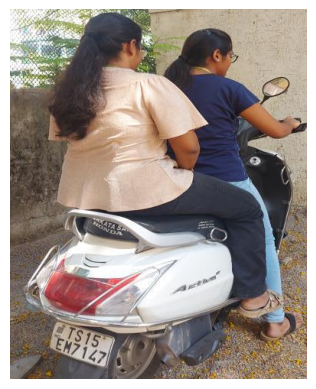


0: 640x544 1 0, 2 1s, 1 4, 320.4ms
Speed: 8.2ms preprocess, 320.4ms inference, 5.1ms postprocess per image at shape (1, 3, 640, 544)
ultralytics.engine.results.Boxes object with attributes:

cls: tensor([4., 1., 1., 0.])
conf: tensor([0.7717, 0.5149, 0.5087, 0.3205])
data: tensor([[2.9942e+01, 1.4254e-01, 3.6121e+02, 4.8347e+02, 7.7167e-01, 4.0000e+00],
        [8.3037e+01, 7.6111e-01, 1.8489e+02, 8.7850e+01, 5.1493e-01, 1.0000e+00],
        [2.1868e+02, 2.3238e+01, 2.9873e+02, 9.0999e+01, 5.0868e-01, 1.0000e+00],
        [4.1053e+01, 3.9490e+02, 1.4656e+02, 4.8045e+02, 3.2048e-01, 0.0000e+00]])
id: None
is_track: False
orig_shape: (484, 388)
shape: torch.Size([4, 6])
xywh: tensor([[195.5750, 241.8049, 331.2668, 483.3248],
        [133.9655,  44.3055, 101.8570,  87.0887],
        [258.7079,  57.1188,  80.0483,  67.7613],
        [ 93.8087, 437.6724, 105.5106,  85.5464]])
xywhn: tensor([[0.5041, 0.4996, 0.8538, 0.9986],
        [0.3453, 0.0915, 0.2625, 0.1799],
        [0.6668, 0.1180,

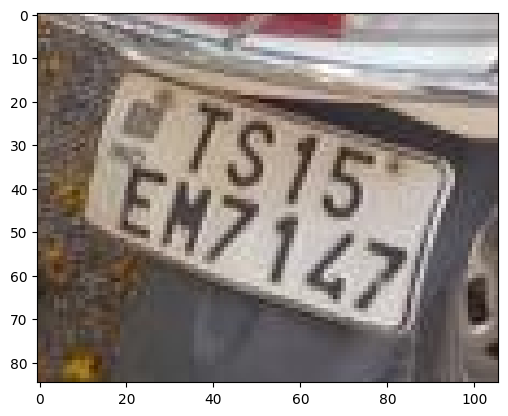

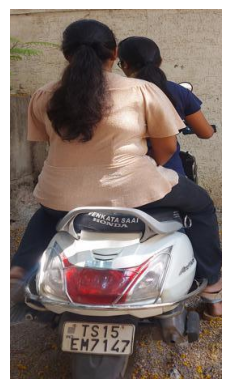


0: 640x384 1 0, 1 1, 1 3, 1 4, 183.6ms
Speed: 0.0ms preprocess, 183.6ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 384)
ultralytics.engine.results.Boxes object with attributes:

cls: tensor([4., 0., 3., 1.])
conf: tensor([0.6331, 0.4217, 0.3133, 0.2588])
data: tensor([[5.5089e+00, 0.0000e+00, 2.5317e+02, 4.5700e+02, 6.3305e-01, 4.0000e+00],
        [4.8826e+01, 3.6583e+02, 1.6208e+02, 4.3773e+02, 4.2173e-01, 0.0000e+00],
        [5.8610e+01, 1.0298e+01, 1.3495e+02, 9.0287e+01, 3.1330e-01, 3.0000e+00],
        [1.3262e+02, 2.9669e+01, 1.9266e+02, 9.0592e+01, 2.5876e-01, 1.0000e+00]])
id: None
is_track: False
orig_shape: (457, 262)
shape: torch.Size([4, 6])
xywh: tensor([[129.3410, 228.5000, 247.6644, 457.0000],
        [105.4523, 401.7772, 113.2534,  71.9028],
        [ 96.7786,  50.2928,  76.3382,  79.9890],
        [162.6403,  60.1306,  60.0383,  60.9233]])
xywhn: tensor([[0.4937, 0.5000, 0.9453, 1.0000],
        [0.4025, 0.8792, 0.4323, 0.1573],
        [0.3694, 0.1

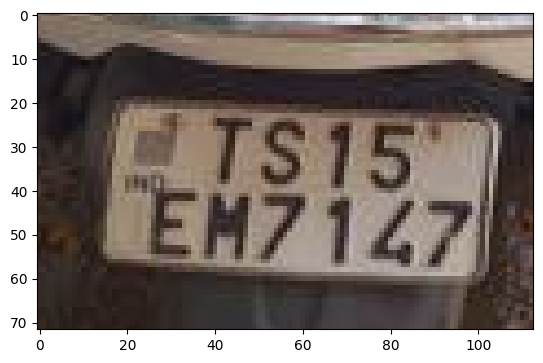

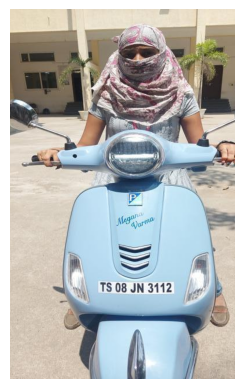


0: 640x416 1 0, 1 2, 1 3, 1 4, 283.8ms
Speed: 0.0ms preprocess, 283.8ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 416)
ultralytics.engine.results.Boxes object with attributes:

cls: tensor([4., 2., 0., 3.])
conf: tensor([0.4792, 0.3969, 0.3798, 0.2768])
data: tensor([[5.6394e+01, 1.9581e+00, 3.6954e+02, 6.4000e+02, 4.7915e-01, 4.0000e+00],
        [1.7797e+02, 2.0284e+01, 2.7568e+02, 1.2187e+02, 3.9694e-01, 2.0000e+00],
        [1.0877e+02, 4.5067e+02, 3.2578e+02, 5.1013e+02, 3.7977e-01, 0.0000e+00],
        [1.7701e+02, 2.0903e+01, 2.7617e+02, 1.2446e+02, 2.7681e-01, 3.0000e+00]])
id: None
is_track: False
orig_shape: (640, 388)
shape: torch.Size([4, 6])
xywh: tensor([[212.9683, 320.9791, 313.1482, 638.0419],
        [226.8249,  71.0794,  97.7133, 101.5910],
        [217.2761, 480.3992, 217.0064,  59.4539],
        [226.5880,  72.6808,  99.1645, 103.5553]])
xywhn: tensor([[0.5489, 0.5015, 0.8071, 0.9969],
        [0.5846, 0.1111, 0.2518, 0.1587],
        [0.5600, 0.7

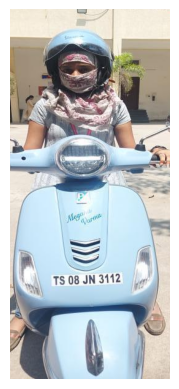


0: 640x288 2 0s, 1 2, 1 4, 193.9ms
Speed: 2.8ms preprocess, 193.9ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 288)
ultralytics.engine.results.Boxes object with attributes:

cls: tensor([2., 4., 0., 0.])
conf: tensor([0.8304, 0.6415, 0.3823, 0.3442])
data: tensor([[4.2978e+01, 2.5844e+01, 1.7595e+02, 1.5772e+02, 8.3035e-01, 2.0000e+00],
        [1.2786e+01, 1.0711e+00, 2.4612e+02, 6.0324e+02, 6.4145e-01, 4.0000e+00],
        [4.1749e+01, 4.0970e+02, 2.1233e+02, 4.6615e+02, 3.8227e-01, 0.0000e+00],
        [4.7947e+01, 4.1802e+02, 1.9293e+02, 4.6142e+02, 3.4424e-01, 0.0000e+00]])
id: None
is_track: False
orig_shape: (605, 261)
shape: torch.Size([4, 6])
xywh: tensor([[109.4619,  91.7818, 132.9682, 131.8753],
        [129.4526, 302.1535, 233.3324, 602.1648],
        [127.0371, 437.9222, 170.5762,  56.4469],
        [120.4380, 439.7187, 144.9829,  43.4030]])
xywhn: tensor([[0.4194, 0.1517, 0.5095, 0.2180],
        [0.4960, 0.4994, 0.8940, 0.9953],
        [0.4867, 0.7238,

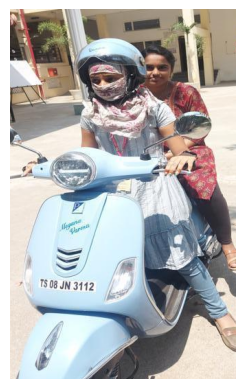


0: 640x416 1 1, 1 2, 1 4, 178.1ms
Speed: 8.0ms preprocess, 178.1ms inference, 7.5ms postprocess per image at shape (1, 3, 640, 416)
ultralytics.engine.results.Boxes object with attributes:

cls: tensor([2., 4., 1.])
conf: tensor([0.8400, 0.8051, 0.4683])
data: tensor([[8.6484e+01, 3.8997e+01, 2.0000e+02, 1.4784e+02, 8.4004e-01, 2.0000e+00],
        [6.8632e+00, 1.9967e+01, 3.1604e+02, 5.2840e+02, 8.0512e-01, 4.0000e+00],
        [1.8391e+02, 5.1440e+01, 2.4582e+02, 1.1588e+02, 4.6832e-01, 1.0000e+00]])
id: None
is_track: False
orig_shape: (539, 329)
shape: torch.Size([3, 6])
xywh: tensor([[143.2414,  93.4186, 113.5138, 108.8434],
        [161.4507, 274.1811, 309.1750, 508.4286],
        [214.8674,  83.6603,  61.9081,  64.4413]])
xywhn: tensor([[0.4354, 0.1733, 0.3450, 0.2019],
        [0.4907, 0.5087, 0.9397, 0.9433],
        [0.6531, 0.1552, 0.1882, 0.1196]])
xyxy: tensor([[ 86.4845,  38.9969, 199.9983, 147.8403],
        [  6.8632,  19.9667, 316.0382, 528.3954],
        [183.9134,  

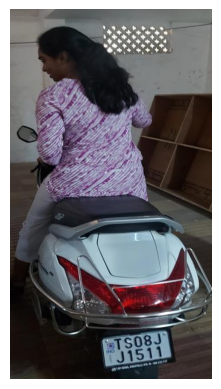


0: 640x352 1 0, 1 1, 1 4, 149.6ms
Speed: 0.0ms preprocess, 149.6ms inference, 6.9ms postprocess per image at shape (1, 3, 640, 352)
ultralytics.engine.results.Boxes object with attributes:

cls: tensor([4., 0., 1.])
conf: tensor([0.7773, 0.6821, 0.5144])
data: tensor([[1.0550e+01, 1.0149e+01, 3.1852e+02, 6.3500e+02, 7.7725e-01, 4.0000e+00],
        [1.3935e+02, 5.4497e+02, 2.8801e+02, 6.1771e+02, 6.8206e-01, 0.0000e+00],
        [3.2741e+01, 2.6291e+01, 1.7342e+02, 1.4144e+02, 5.1436e-01, 1.0000e+00]])
id: None
is_track: False
orig_shape: (635, 346)
shape: torch.Size([3, 6])
xywh: tensor([[164.5339, 322.5745, 307.9674, 624.8510],
        [213.6819, 581.3387, 148.6649,  72.7383],
        [103.0799,  83.8665, 140.6776, 115.1511]])
xywhn: tensor([[0.4755, 0.5080, 0.8901, 0.9840],
        [0.6176, 0.9155, 0.4297, 0.1145],
        [0.2979, 0.1321, 0.4066, 0.1813]])
xyxy: tensor([[ 10.5502,  10.1490, 318.5176, 635.0000],
        [139.3495, 544.9695, 288.0144, 617.7078],
        [ 32.7411,  

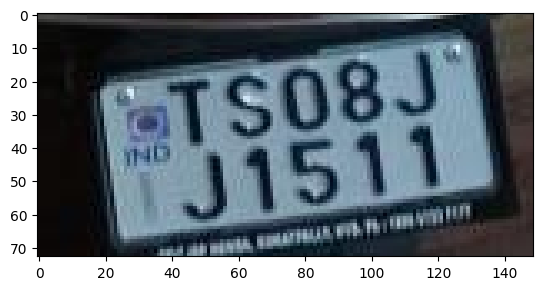

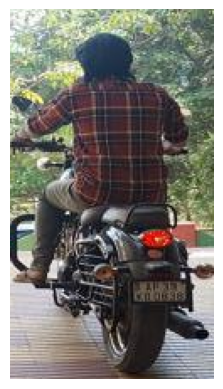


0: 640x352 1 0, 1 2, 1 4, 258.5ms
Speed: 2.6ms preprocess, 258.5ms inference, 2.4ms postprocess per image at shape (1, 3, 640, 352)
ultralytics.engine.results.Boxes object with attributes:

cls: tensor([2., 4., 0.])
conf: tensor([0.5981, 0.5684, 0.4993])
data: tensor([[ 34.1514,  12.5943,  76.1894,  44.4292,   0.5981,   2.0000],
        [  2.5593,   6.8805, 113.6537, 216.0933,   0.5684,   4.0000],
        [ 67.5817, 157.3414, 110.3278, 177.3254,   0.4993,   0.0000]])
id: None
is_track: False
orig_shape: (220, 121)
shape: torch.Size([3, 6])
xywh: tensor([[ 55.1704,  28.5118,  42.0380,  31.8349],
        [ 58.1065, 111.4869, 111.0944, 209.2127],
        [ 88.9548, 167.3334,  42.7461,  19.9840]])
xywhn: tensor([[0.4560, 0.1296, 0.3474, 0.1447],
        [0.4802, 0.5068, 0.9181, 0.9510],
        [0.7352, 0.7606, 0.3533, 0.0908]])
xyxy: tensor([[ 34.1514,  12.5943,  76.1894,  44.4292],
        [  2.5593,   6.8805, 113.6537, 216.0933],
        [ 67.5817, 157.3414, 110.3278, 177.3254]])
xyxyn

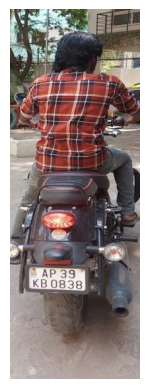


0: 640x256 2 0s, 1 2, 1 4, 282.5ms
Speed: 6.2ms preprocess, 282.5ms inference, 4.6ms postprocess per image at shape (1, 3, 640, 256)
ultralytics.engine.results.Boxes object with attributes:

cls: tensor([4., 0., 2., 0.])
conf: tensor([0.7226, 0.5276, 0.3732, 0.3220])
data: tensor([[1.2234e+01, 3.4714e+00, 1.8684e+02, 5.4625e+02, 7.2260e-01, 4.0000e+00],
        [1.7008e+01, 3.8311e+02, 1.2427e+02, 4.3140e+02, 5.2756e-01, 0.0000e+00],
        [5.9698e+01, 2.9473e+01, 1.4442e+02, 9.8174e+01, 3.7320e-01, 2.0000e+00],
        [1.6534e+01, 3.7268e+02, 1.3025e+02, 4.3959e+02, 3.2198e-01, 0.0000e+00]])
id: None
is_track: False
orig_shape: (561, 197)
shape: torch.Size([4, 6])
xywh: tensor([[ 99.5374, 274.8608, 174.6076, 542.7787],
        [ 70.6369, 407.2523, 107.2574,  48.2882],
        [102.0614,  63.8233,  84.7263,  68.7013],
        [ 73.3943, 406.1361, 113.7206,  66.9177]])
xywhn: tensor([[0.5053, 0.4899, 0.8863, 0.9675],
        [0.3586, 0.7259, 0.5445, 0.0861],
        [0.5181, 0.1138,

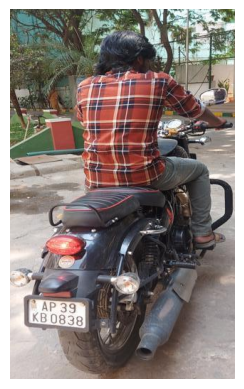


0: 640x416 2 0s, 1 2, 1 4, 167.6ms
Speed: 0.0ms preprocess, 167.6ms inference, 8.3ms postprocess per image at shape (1, 3, 640, 416)
ultralytics.engine.results.Boxes object with attributes:

cls: tensor([4., 2., 0., 0.])
conf: tensor([0.8294, 0.3739, 0.3614, 0.2970])
data: tensor([[1.4100e+01, 0.0000e+00, 2.9928e+02, 5.0904e+02, 8.2944e-01, 4.0000e+00],
        [1.1721e+02, 2.9144e+01, 2.1173e+02, 9.1304e+01, 3.7388e-01, 2.0000e+00],
        [2.1416e+01, 4.0111e+02, 1.1732e+02, 4.5077e+02, 3.6139e-01, 0.0000e+00],
        [1.0371e+01, 3.9648e+02, 1.2920e+02, 4.5794e+02, 2.9697e-01, 0.0000e+00]])
id: None
is_track: False
orig_shape: (521, 316)
shape: torch.Size([4, 6])
xywh: tensor([[156.6885, 254.5218, 285.1776, 509.0435],
        [164.4719,  60.2239,  94.5146,  62.1605],
        [ 69.3701, 425.9405,  95.9089,  49.6515],
        [ 69.7851, 427.2108, 118.8281,  61.4652]])
xywhn: tensor([[0.4958, 0.4885, 0.9025, 0.9771],
        [0.5205, 0.1156, 0.2991, 0.1193],
        [0.2195, 0.8175,

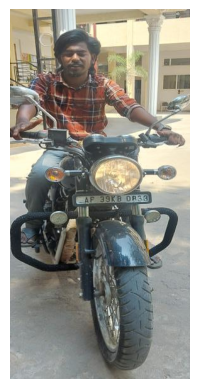


0: 640x320 1 0, 1 2, 1 4, 160.1ms
Speed: 4.5ms preprocess, 160.1ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 320)
ultralytics.engine.results.Boxes object with attributes:

cls: tensor([4., 0., 2.])
conf: tensor([0.6994, 0.5845, 0.4583])
data: tensor([[1.0017e+01, 1.1525e+01, 2.7188e+02, 5.7618e+02, 6.9941e-01, 4.0000e+00],
        [9.2755e+01, 2.8586e+02, 2.3466e+02, 3.1784e+02, 5.8450e-01, 0.0000e+00],
        [6.4130e+01, 2.9908e+01, 1.4610e+02, 1.2138e+02, 4.5835e-01, 2.0000e+00]])
id: None
is_track: False
orig_shape: (588, 286)
shape: torch.Size([3, 6])
xywh: tensor([[140.9482, 293.8501, 261.8632, 564.6504],
        [163.7049, 301.8493, 141.9005,  31.9778],
        [105.1170,  75.6447,  81.9747,  91.4735]])
xywhn: tensor([[0.4928, 0.4997, 0.9156, 0.9603],
        [0.5724, 0.5133, 0.4962, 0.0544],
        [0.3675, 0.1286, 0.2866, 0.1556]])
xyxy: tensor([[ 10.0166,  11.5249, 271.8797, 576.1753],
        [ 92.7547, 285.8604, 234.6552, 317.8382],
        [ 64.1297,  

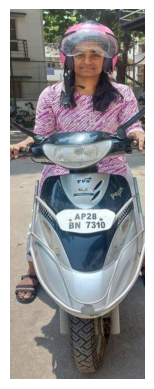


0: 640x256 1 0, 1 2, 1 4, 190.1ms
Speed: 2.1ms preprocess, 190.1ms inference, 4.2ms postprocess per image at shape (1, 3, 640, 256)
ultralytics.engine.results.Boxes object with attributes:

cls: tensor([4., 2., 0.])
conf: tensor([0.7774, 0.6087, 0.5685])
data: tensor([[2.4419e+01, 0.0000e+00, 2.1687e+02, 6.0750e+02, 7.7742e-01, 4.0000e+00],
        [6.9796e+01, 8.4637e+00, 1.8931e+02, 1.3306e+02, 6.0872e-01, 2.0000e+00],
        [7.5287e+01, 3.2976e+02, 1.7360e+02, 3.8057e+02, 5.6846e-01, 0.0000e+00]])
id: None
is_track: False
orig_shape: (620, 225)
shape: torch.Size([3, 6])
xywh: tensor([[120.6424, 303.7502, 192.4459, 607.5004],
        [129.5534,  70.7641, 119.5143, 124.6008],
        [124.4445, 355.1629,  98.3150,  50.8105]])
xywhn: tensor([[0.5362, 0.4899, 0.8553, 0.9798],
        [0.5758, 0.1141, 0.5312, 0.2010],
        [0.5531, 0.5728, 0.4370, 0.0820]])
xyxy: tensor([[ 24.4194,   0.0000, 216.8653, 607.5004],
        [ 69.7963,   8.4637, 189.3106, 133.0645],
        [ 75.2870, 3

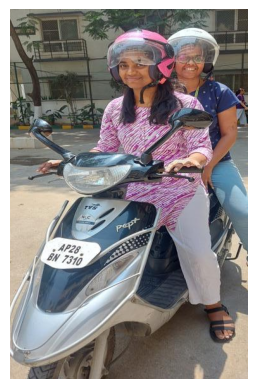


0: 640x416 1 0, 2 2s, 1 4, 159.2ms
Speed: 0.0ms preprocess, 159.2ms inference, 0.3ms postprocess per image at shape (1, 3, 640, 416)
ultralytics.engine.results.Boxes object with attributes:

cls: tensor([4., 2., 2., 0.])
conf: tensor([0.8371, 0.7239, 0.6401, 0.2608])
data: tensor([[1.2773e+01, 2.4345e+01, 3.6357e+02, 5.8400e+02, 8.3706e-01, 4.0000e+00],
        [1.4160e+02, 1.9851e+01, 2.6634e+02, 1.4837e+02, 7.2392e-01, 2.0000e+00],
        [2.3998e+02, 1.8870e+01, 3.3660e+02, 1.3528e+02, 6.4010e-01, 2.0000e+00],
        [3.9503e+01, 3.4554e+02, 1.4731e+02, 4.2295e+02, 2.6077e-01, 0.0000e+00]])
id: None
is_track: False
orig_shape: (586, 376)
shape: torch.Size([4, 6])
xywh: tensor([[188.1696, 304.1708, 350.7935, 559.6526],
        [203.9687,  84.1125, 124.7329, 128.5235],
        [288.2897,  77.0770,  96.6138, 116.4137],
        [ 93.4088, 384.2422, 107.8110,  77.4104]])
xywhn: tensor([[0.5005, 0.5191, 0.9330, 0.9550],
        [0.5425, 0.1435, 0.3317, 0.2193],
        [0.7667, 0.1315,

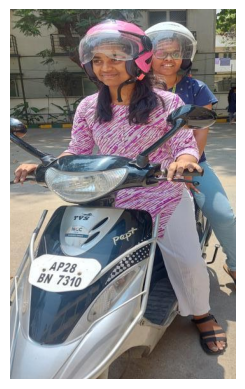


0: 640x416 1 0, 2 2s, 1 4, 225.9ms
Speed: 0.0ms preprocess, 225.9ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 416)
ultralytics.engine.results.Boxes object with attributes:

cls: tensor([4., 2., 2., 0.])
conf: tensor([0.8227, 0.6477, 0.5556, 0.2580])
data: tensor([[3.1680e+01, 5.7180e-01, 3.1298e+02, 5.8046e+02, 8.2266e-01, 4.0000e+00],
        [9.4342e+01, 5.8578e+00, 2.2647e+02, 1.3377e+02, 6.4768e-01, 2.0000e+00],
        [2.0323e+02, 1.2484e+01, 2.9605e+02, 1.2457e+02, 5.5558e-01, 2.0000e+00],
        [2.3407e+01, 3.7163e+02, 1.3905e+02, 4.4965e+02, 2.5805e-01, 0.0000e+00]])
id: None
is_track: False
orig_shape: (582, 355)
shape: torch.Size([4, 6])
xywh: tensor([[172.3313, 290.5137, 281.3020, 579.8839],
        [160.4072,  69.8158, 132.1296, 127.9159],
        [249.6423,  68.5279,  92.8152, 112.0881],
        [ 81.2299, 410.6399, 115.6448,  78.0145]])
xywhn: tensor([[0.4854, 0.4992, 0.7924, 0.9964],
        [0.4519, 0.1200, 0.3722, 0.2198],
        [0.7032, 0.1177,

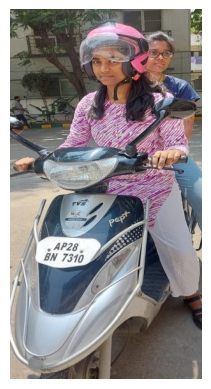


0: 640x352 1 1, 1 2, 1 4, 258.8ms
Speed: 1.8ms preprocess, 258.8ms inference, 8.1ms postprocess per image at shape (1, 3, 640, 352)
ultralytics.engine.results.Boxes object with attributes:

cls: tensor([4., 2., 1.])
conf: tensor([0.8081, 0.5576, 0.4050])
data: tensor([[2.5314e+01, 7.4159e+00, 2.8724e+02, 5.7908e+02, 8.0806e-01, 4.0000e+00],
        [9.7885e+01, 1.3070e+01, 2.2166e+02, 1.3173e+02, 5.5756e-01, 2.0000e+00],
        [2.0438e+02, 3.0130e+01, 2.6505e+02, 1.0896e+02, 4.0496e-01, 1.0000e+00]])
id: None
is_track: False
orig_shape: (582, 301)
shape: torch.Size([3, 6])
xywh: tensor([[156.2748, 293.2484, 261.9222, 571.6649],
        [159.7732,  72.4006, 123.7761, 118.6606],
        [234.7162,  69.5471,  60.6719,  78.8333]])
xywhn: tensor([[0.5192, 0.5039, 0.8702, 0.9822],
        [0.5308, 0.1244, 0.4112, 0.2039],
        [0.7798, 0.1195, 0.2016, 0.1355]])
xyxy: tensor([[ 25.3137,   7.4159, 287.2359, 579.0808],
        [ 97.8852,  13.0703, 221.6613, 131.7309],
        [204.3802,  

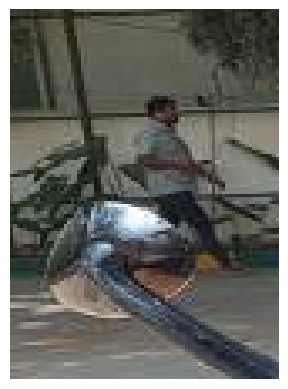


0: 640x480 1 1, 1 4, 164.6ms
Speed: 0.0ms preprocess, 164.6ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 480)
ultralytics.engine.results.Boxes object with attributes:

cls: tensor([4., 1.])
conf: tensor([0.5313, 0.4458])
data: tensor([[  3.0449,  14.1216,  76.5725, 109.4057,   0.5313,   4.0000],
        [ 38.1760,  22.4488,  52.1585,  38.6398,   0.4458,   1.0000]])
id: None
is_track: False
orig_shape: (110, 80)
shape: torch.Size([2, 6])
xywh: tensor([[39.8087, 61.7637, 73.5276, 95.2841],
        [45.1672, 30.5443, 13.9825, 16.1909]])
xywhn: tensor([[0.4976, 0.5615, 0.9191, 0.8662],
        [0.5646, 0.2777, 0.1748, 0.1472]])
xyxy: tensor([[  3.0449,  14.1216,  76.5725, 109.4057],
        [ 38.1760,  22.4488,  52.1585,  38.6398]])
xyxyn: tensor([[0.0381, 0.1284, 0.9572, 0.9946],
        [0.4772, 0.2041, 0.6520, 0.3513]])


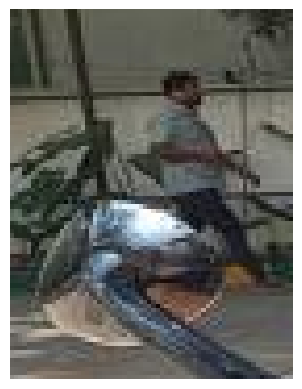


0: 640x512 1 1, 1 4, 191.3ms
Speed: 0.0ms preprocess, 191.3ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 512)
ultralytics.engine.results.Boxes object with attributes:

cls: tensor([4., 1.])
conf: tensor([0.4864, 0.3905])
data: tensor([[ 1.3116,  4.8714, 61.7083, 88.9998,  0.4864,  4.0000],
        [34.7110, 13.0874, 47.7321, 26.1549,  0.3905,  1.0000]])
id: None
is_track: False
orig_shape: (89, 68)
shape: torch.Size([2, 6])
xywh: tensor([[31.5100, 46.9356, 60.3967, 84.1284],
        [41.2216, 19.6211, 13.0211, 13.0675]])
xywhn: tensor([[0.4634, 0.5274, 0.8882, 0.9453],
        [0.6062, 0.2205, 0.1915, 0.1468]])
xyxy: tensor([[ 1.3116,  4.8714, 61.7083, 88.9998],
        [34.7110, 13.0874, 47.7321, 26.1549]])
xyxyn: tensor([[0.0193, 0.0547, 0.9075, 1.0000],
        [0.5105, 0.1470, 0.7019, 0.2939]])


In [19]:
image_folder = "data"
folder_path = "numberplates"
# List images in the folder

# Process each image
for file in os.listdir(image_folder):
  if file.endswith(('.jpg', '.jpeg', '.png')):
    image_file = os.path.join(image_folder, file)
    img = Image.open(image_file)
    result=[]
    tfile = os.path.splitext(file)[0] +'.txt'
    with open('runs\\detect\\predict2\\labels\\' + tfile, 'r') as f:
        line = f.readline()
        while line:
          result.append(list(map(float,line.split())))
          line = f.readline()
    #print(result)
    for r in result:
      if r[0] == 4.0:
        height, width= img.size
        x_center, y_center, bbox_width, bbox_height = r[1], r[2], r[3], r[4]
        x1 = int((x_center - bbox_width/2) * height)
        y1 = int((y_center - bbox_height/2) * width)
        x2 = int((x_center + bbox_width/2) * height)
        y2 = int((y_center + bbox_height/2) * width)
        roi =  img.crop((x1, y1, x2, y2))
        plt.figure()
        plt.imshow(roi)
        plt.axis('off')
        plt.show()
        detections = YOLOv8_model.predict(roi,save = False, save_txt = False)
        for detection in detections:
          bbox = detection.boxes
          print(bbox)
          classes = bbox.cls.tolist()
          xyxy = bbox.xyxy.tolist()
          if 1 in classes and 0 in classes:
            print("find number plate from lower part")
            i = classes.index(0)
            dim = xyxy[i]
            numplate =  roi.crop((dim[0], dim[1], dim[2], dim[3]))
            numplate = numplate.convert("RGB")
            plt.figure()
            plt.imshow(numplate)
            plt.show()
            file_count = 1
            base_filename = file
            filename = ""
            while True:
              filename = f"{base_filename}_{file_count}.jpg"
              if not os.path.exists(os.path.join(folder_path, filename)):
                  break
              file_count += 1
            numplate.save(os.path.join(folder_path, filename))
            # ocr_result = reader.readtext(os.path.join(folder_path, file))
            # print(ocr_result)


In [12]:
import mysql.connector
from mysql.connector import Error

In [13]:
def create_server_connection(host_name,user_name,user_password, db_name):
    connection=None
    try:
      connection=mysql.connector.connect(
          host=host_name,
          user=user_name,
          passwd=user_password,
          database=db_name
      )
      print("MySQL Database connection successful")
    except Error as err:
       print(f"Error:'{err}'")
    return connection

In [14]:
pw ="pavani0707"

 #Database name

db="helmetviolationchallans"
connection=create_server_connection("localhost","root",pw, db)

MySQL Database connection successful


In [15]:
def execute_query(connection, query):
    cursor = connection.cursor()
    try:
       cursor.execute(query)
       connection.commit()
       print("Query was successful")
    except Error as err:
        print(f"Error: '{err}'")


In [ ]:
# v='TS04562353'
# sql_query = f"""
# INSERT INTO vehicle_number_plate VALUES ('{v}')
# """
# execute_query(connection, sql_query)

In [8]:
import numpy as np

In [9]:
import re

In [10]:
def post_process_text(result):
    cleaned_text = ''
    # Remove non-alphanumeric characters and extra spaces
    cleaned_text += re.sub(r'[^a-zA-Z0-9\s]', '', result) + ' '
    cleaned_text = re.sub(r'\s+', ' ', cleaned_text).strip()
    cleaned_text= cleaned_text.replace("IND", "")
    return cleaned_text

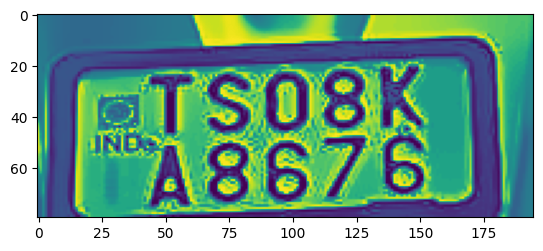

[2024/04/18 09:51:57] ppocr DEBUG: dt_boxes num : 3, elapsed : 0.016324758529663086
[2024/04/18 09:51:57] ppocr DEBUG: cls num  : 3, elapsed : 0.02312183380126953
[2024/04/18 09:51:57] ppocr DEBUG: rec_res num  : 3, elapsed : 0.2415909767150879
S08A867
Query was successful


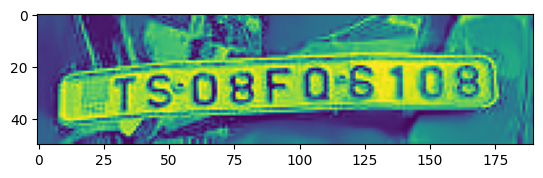

[2024/04/18 09:51:57] ppocr DEBUG: dt_boxes num : 1, elapsed : 0.035677194595336914
[2024/04/18 09:51:57] ppocr DEBUG: cls num  : 1, elapsed : 0.07987403869628906
[2024/04/18 09:51:57] ppocr DEBUG: rec_res num  : 1, elapsed : 0.18789458274841309
TS08FQ6108
Query was successful


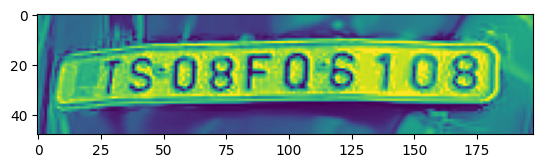

[2024/04/18 09:51:58] ppocr DEBUG: dt_boxes num : 1, elapsed : 0.02114105224609375
[2024/04/18 09:51:58] ppocr DEBUG: cls num  : 1, elapsed : 0.011760473251342773
[2024/04/18 09:51:58] ppocr DEBUG: rec_res num  : 1, elapsed : 0.1583864688873291
TS08F06108
Query was successful


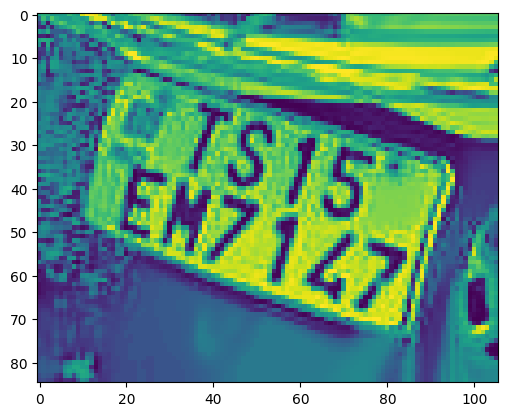

[2024/04/18 09:51:58] ppocr DEBUG: dt_boxes num : 2, elapsed : 0.017262697219848633
[2024/04/18 09:51:58] ppocr DEBUG: cls num  : 2, elapsed : 0.06638908386230469
[2024/04/18 09:51:58] ppocr DEBUG: rec_res num  : 2, elapsed : 0.22510242462158203
TS15EM7147
Query was successful


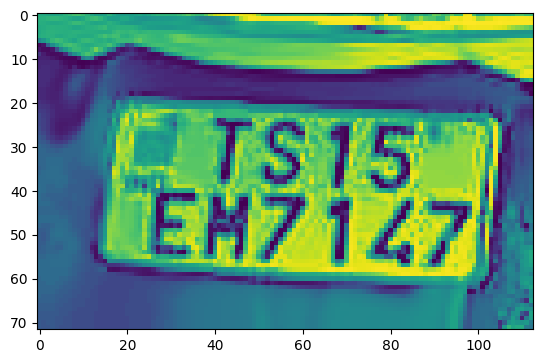

[2024/04/18 09:51:58] ppocr DEBUG: dt_boxes num : 2, elapsed : 0.09240031242370605
[2024/04/18 09:51:59] ppocr DEBUG: cls num  : 2, elapsed : 0.007480144500732422
[2024/04/18 09:51:59] ppocr DEBUG: rec_res num  : 2, elapsed : 0.21753907203674316
TS15EM7147
Query was successful


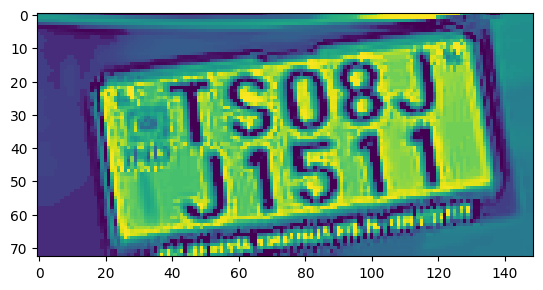

[2024/04/18 09:51:59] ppocr DEBUG: dt_boxes num : 3, elapsed : 0.10835552215576172
[2024/04/18 09:51:59] ppocr DEBUG: cls num  : 3, elapsed : 0.016682863235473633
[2024/04/18 09:51:59] ppocr DEBUG: rec_res num  : 3, elapsed : 0.1915299892425537
STS08JJ1511
Query was successful


In [17]:
numplate_folder = "numberplates"
for file in os.listdir(numplate_folder):
  if file.endswith(('.jpg', '.jpeg', '.png')):
    image_file = os.path.join(numplate_folder, file)
    image = cv2.imread(image_file)
    # Pre-processing
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    sharp = cv2.GaussianBlur(gray, (0, 0), 3)
    gray = cv2.addWeighted(gray, 1.5, sharp, -0.5, 0)
    gray = cv2.fastNlMeansDenoising(gray, h=10, searchWindowSize=21)
    gray = cv2.equalizeHist(gray)
    plt.figure()
    plt.imshow(gray)
    plt.show()
    #ocr_result = reader.readtext(gray)
    #print(ocr_result)
    # numplate = ''
    # for item in ocr_result:
    #     numplate += item[1]
    # numplate=post_process_text(numplate)
    # print(numplate)
    result = ocr.ocr(gray, cls =True)

    concatenated_text=''
    for word_info in result[0]:
        # Extract the text from the word tuple (which is at index 1 of the tuple)
        word_text = word_info[1][0]
        # Concatenate the word text to the overall text
        concatenated_text += word_text

    # Print the concatenated text
    concatenated_text=post_process_text(concatenated_text)
    print(concatenated_text)
    sql_query = f"""
    INSERT INTO vehicle_number_plate VALUES ('{concatenated_text}')
    """
    execute_query(connection, sql_query)    